Please find my google drive files through following URL:
    https://drive.google.com/drive/folders/12MCQNKOnWSHkds-BmD2QeK45rgxhdMe5?usp=sharing

<b>Anton's comments:</b> Hello Atajan! Please change the way you have sent the project. You need to upload the ipynb with decomposition + EDA as a project, then add the link to the presentation and tableau as a separate cell

# Scope of the Project
Analyze the store's loyalty program.
1. Carry out exploratory analysis
2. Analyze the loyalty program
3. Formulate and test statistical hypotheses


## Tasks of the project
#### Questions:
1. Are we identifying the difference in churn between loyalty members and regular customers?
2. Are we identifying the difference in revenue between loyalty members and regular customers?
3. Are we running an A/B test to test our hypotheses?
4. Should we use Tableau to develop the dashboards/visualizations?

## Answers
1. It is not stated if you should in task. Do so if you feel that this is needed.
2. Same answer here
3. A/B testing is another task, please look into it later
4. Would be good if you do

## Step 1: Preprocess Data
The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts.
 
`retail_dataset_us.csv` contains:
 
- `purchaseId`
- `item_ID`
- `purchasedate`
- `Quantity` — the number of items in the purchase
- `CustomerID`
- `ShopID`
- `loyalty_program` — whether the customer is a member of the loyalty program
 
`product_codes_us.csv` contains:
 
- `productID`
- `price_per_one`

<br>File path: /datasets/retail_dataset_us.csv. Download the dataset.
<br>File path: /datasets/product_codes_us.csv. Download the dataset.


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read files retail codes as retail, and product codes as products
retail = pd.read_csv("https://code.s3.yandex.net/datasets/retail_dataset_us.csv")
products = pd.read_csv("https://code.s3.yandex.net/datasets/product_codes_us.csv",sep=';')

#lower all the column names for the uniformity
products.columns= products.columns.str.lower()
retail.columns= retail.columns.str.lower()

#rename columns for better format
products=products.rename(columns={"productid":"product_id"})
retail=retail.rename(columns={"purchaseid":"purchase_id",\
                                  "purchasedate":"purchase_date","customerid":"customer_id","shopid":"shop_id"})


#output top 5 rows for each file and types of files
print('-*-*-*-'*15)
display('Retail file info below')
display(retail.head())
display(retail.info())
print('-*-*-*-'*15)
display('Products file info below')
display(products.head())
display(products.info())
print('-*-*-*-'*15)




-*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*-


'Retail file info below'

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchase_id        105335 non-null object
item_id            105335 non-null object
quantity           105335 non-null int64
purchase_date      105335 non-null object
customer_id        69125 non-null float64
loyalty_program    105335 non-null int64
shop_id            105335 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


None

-*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*-


'Products file info below'

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
product_id       3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


None

-*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*--*-*-*-


<b> Result:</b> <br>
    
    1.File saved as <b> retail </b> doesnt have any null missing values in both columns and has 3159 records. File types are acceptable format and there is no need to change their types. <br>

    2.File saved as <b> products </b> has 105335 records and CustomerID column has missing values as we have only 69125 records. We will decide what to do with missing values records as we progress further in the evaluation of data. Rest columns have no missing data. Duplicate records will be checked in the box below.
    
    



In [2]:
#counting duplicates
dups =len(products)-len(products.drop_duplicates())
# products.drop_duplicates(keep=False,inplace=True) 
print('Number of duplicates in the products file:', dups)

dups =len(retail)-len(retail.drop_duplicates())
print('Number of duplicates in the retail file:',dups)

#drop duplicate files
products.drop_duplicates(keep=False,inplace=True) 
display(products.head())

Number of duplicates in the products file: 0
Number of duplicates in the retail file: 1033


,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Result: There are 1033 duplicate records in the products file and we don't need to keep them  and it will not be a big loss of data since we have 105335 records. 

In [3]:
#fill in nan values of customer id with random values
#another option, need to uncomment import random #retail['customer_id'] = retail['customer_id'].fillna(value=np.random.uniform(-99999, 0))

#fill missing customer id with customer_id of 0, that way we know that customer_id 0 are all unknown customers 
retail['customer_id'] = retail['customer_id'].fillna(value='0')
#convert date format to Year, month , day
retail['purchase_date']=pd.to_datetime(retail['purchase_date']).dt.normalize()
#products['purchase_date']
#convert customer_id to integer
#retail['customer_id']=pd.to_numeric(retail['customer_id'].round(1)) 
retail['customer_id']=retail['customer_id'].astype(int)
display(retail.head())
display(retail.sort_values(by='customer_id', ascending=True))
retail['item_id']=pd.to_numeric(retail['item_id'],errors='coerce')


,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10,18427,0,Shop 3
1,538862,22195,0,2016-12-14,22389,1,Shop 2
2,538855,21239,7,2016-12-14,22182,1,Shop 3
3,543543,22271,0,2017-02-09,23522,1,Shop 28
4,543812,79321,0,2017-02-13,23151,1,Shop 28


,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
77499,541592,15034,1,2017-01-19,0,0,Shop 0
30526,541999,40001,0,2017-01-25,0,0,Shop 0
71164,540681,22906,0,2017-01-10,0,0,Shop 0
71155,537839,21174,0,2016-12-08,0,0,Shop 0
30531,542624,75049L,0,2017-01-31,0,0,Shop 0
...,...,...,...,...,...,...,...
25397,545079,20969,0,2017-02-28,23962,1,Shop 21
76723,541854,22147,0,2017-01-23,23962,1,Shop 28
5317,540350,85099F,0,2017-01-06,23962,1,Shop 10
100801,540350,22068,1,2017-01-06,23962,1,Shop 10


<b>Result:</b>
<br>
    1. Converted date format to dates with no time, and converted customer_id to integer for better resentation. 
    2. Missing values for customer_id are all set to value of 0. That way we will know that any time we see customer_id of 0, those are unknown customers, perhaps the guest users. If senior analyst has better idea of taggin NAN values of customer ids, we can apply it too. 

## Step 2: EDA

    1.Look at the datasets: do they contain any missing features?  Are the dataypes correct?
    2.Look at the mean feature values in two groups: for those who are loyalty program customers and for those who aren't (use the groupby() method).
    3.Plot bar histograms and feature distributions for those who are loyalty program customers and for those who aren't.
    4.Build a correlation matrix and display it.


### 1.Look at the datasets: do they contain any missing features?  Are the dataypes correct?

In [4]:
missing_retail = retail.isnull().sum()
display('retail missing values:',missing_retail)
missing_products=products.isnull().sum()
display('products missing values:',missing_products)
display('retail data info:',retail.info())
display('products data info:',products.info())

'retail missing values:'

purchase_id            0
item_id            14064
quantity               0
purchase_date          0
customer_id            0
loyalty_program        0
shop_id                0
dtype: int64

'products missing values:'

product_id       0
price_per_one    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchase_id        105335 non-null object
item_id            91271 non-null float64
quantity           105335 non-null int64
purchase_date      105335 non-null datetime64[ns]
customer_id        105335 non-null int64
loyalty_program    105335 non-null int64
shop_id            105335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.6+ MB


'retail data info:'

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3159 entries, 0 to 3158
Data columns (total 2 columns):
product_id       3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 74.0+ KB


'products data info:'

None

Result: There are no missing values in the products table under customerid column. Date fields are correctly converted into dates.

### 2.Look at the mean feature values in two groups: for those who are loyalty program customers and for those who aren't (use the groupby() method).

In [30]:
mean_retail = retail.groupby('loyalty_program')['quantity'].mean()
display(mean_retail)



loyalty_program
0    7.297351
1    9.611819
Name: quantity, dtype: float64

Result: For Loyalty program of 0 average quantity is 7.3, while for program 1 average for quantity is 9.6

### 3.Plot bar histograms and feature distributions for those who are loyalty program customers and for those who aren't.

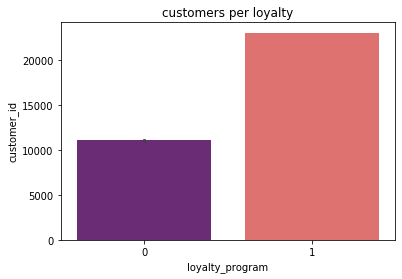

In [6]:
retail.dropna()
sns.barplot(x = 'loyalty_program',y='customer_id',  data = retail, palette = 'magma').set(title='customers per loyalty')
plt.show()


Result: There are far more customers in loyalty program 1, twice more. Over 20,000.

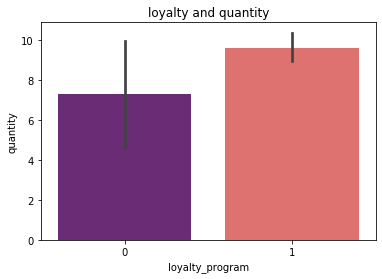

In [7]:
sns.barplot(x = 'loyalty_program',y='quantity',  data = retail, palette = 'magma').set(title='loyalty and quantity')
plt.show()


Result : as for quantity there again more values in loyalty program of 1 than in 0.

### 4. Build a correlation matrix and display it.

[Text(0.5, 1, 'Correlation matrix')]

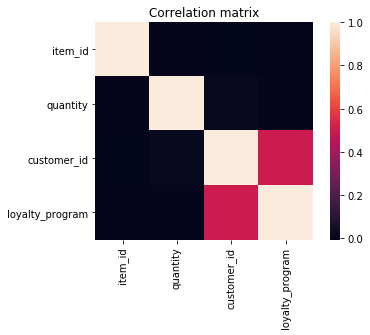

In [8]:
corr = retail.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True).set(title='Correlation matrix')


Result: As we see there is a visible correlation between customer_id and loyalty program. Not much correlation among other fields.

### 5.Analyze top and bottom products 

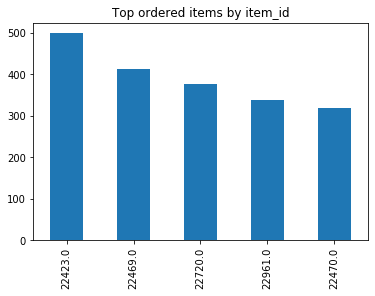

In [28]:
plt.title('Top ordered items by item_id')
retail['item_id'].value_counts().nlargest(5).plot.bar()

Result: items 22423, 22469, 22720, 22961, 22470 are the most popular items in the written order. With range of 320 to 499 times ordered.

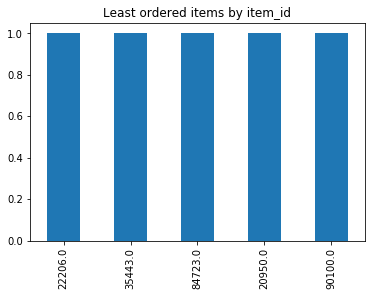

In [29]:
plt.title('Least ordered items by item_id')
retail['item_id'].value_counts().nsmallest(5).plot.bar()

Result:Least ordered items are 22206, 35443, 84723, 20950, 90100. Perhaps we need to put them on sale.

## URL for Tableu project in the cell below.

A/B Tableu
https://public.tableau.com/profile/atajan.abdyyev#!/vizhome/ABtest_16108492978820/Dashboard1?publish=yes

Retail EDA Tableu
https://public.tableau.com/profile/atajan.abdyyev#!/vizhome/retailloyaltyproject/DashboardforRetailLoyaltyProgramAnalysis?publish=yes



## Conclusion

1. There are no missing values in the products table under customerid column. Date fields are correctly converted into dates.

2. For Loyalty program of 0 average quantity is 7.3, while for program 1 average for quantity is 9.6
3. There are far more customers in loyalty program 1, twice more. Over 20,000.
4. As we see there is a visible correlation between customer_id and loyalty program. Not much correlation among other fields.
5. items 22423, 22469, 22720, 22961, 22470 are the most popular items in the written order. With range of 320 to 499 times ordered.
6. Least ordered items are 22206, 35443, 84723, 20950, 90100. Perhaps we need to put them on sale.

<b>Anton's comments:</b> Good job Atajan! Thank you for resubmitting the project the right way!
<ul>
    <li><b>Project -</b> Good structure, nice EDA and pretty graphs - I like it!</li>
    <li><b>Presentation -</b> We are very low on time, so I will pass the presentation. But let's be honest - you can't throw in some screenshots to the guys you are reporting to - this does not look like a reasearh and devalues you (overall nicely done) job.</li>
    <li><b>Dashboards -</b> Retail loyalty - I'd be happy to see more than 1 graph. The "sheet 1" header is also not needed. A/B test - Don't really understand the value of the number of events per day graph? Otherwise a nice dashboard!</li>
    <li><b>Documentation -</b> I did not see the documentation part in your presentation. Seems that you have enough points to pass, but if I missed - please DM me so I add the points :)</li>
</ul>
<p>It was a pleasure working with you. Contact me whenever you need any assistance.</p>